# Basic Component Customization

When you're making a RAG application, you won't just have unstructured documents and texts as well as question answering isn't the only thing you want to have. With how agenticrag library is built, it's easily extensible allowing for plug and play type of architecture where you all components works individually and can be added and removed from central agenticrag as per your need.

So in this notebook, we'll learn about individual components and on how to use more inbuilt retrievers, connectors and tasks as needed.

## Chart Generation and dealing with tabular data

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [ ]:
from agenticrag import RAGAgent, TableRetriever, ChartGenerationTask

os.environ["GEMINI_API_KEY"] = "<YOUR GEMINI API KEY>" 

agent = RAGAgent(
    retrievers=[TableRetriever()],
    tasks=[ChartGenerationTask()]
)

In [3]:
agent.load_csv("data/Iris.csv") # Similarly we can load excel files, json files or directly as pandas DF

MetaData(id=5, format=<DataFormat.TABLE: 'table'>, name='Iris.csv', description='This dataset appears to describe measurements of Iris flowers. For each flower, it includes the sepal length and width, as well as the petal length and width, all measured in centimeters. The dataset also identifies the species of each Iris flower, allowing for analysis and comparison between different Iris species based on their physical characteristics.', source='data/Iris.csv')

RAGAgentResponse(success=True, content='Here is the scatter plot showing petal length vs petal width for different Iris species, with setosa in red, versicolor in blue, and virginica in green.\n\n![Petal Scatter Plot](.agenticrag_data/charts/petal_scatter.png)', iterations=2, datasets=[MetaData(id=5, format=<DataFormat.TABLE: 'table'>, name='Iris.csv', description='This dataset appears to describe measurements of Iris flowers. For each flower, it includes the sepal length and width, as well as the petal length and width, all measured in centimeters. The dataset also identifies the species of each Iris flower, allowing for analysis and comparison between different Iris species based on their physical characteristics.', source='data/Iris.csv')], retrievers=[<agenticrag.retrievers.table_data_retriever.TableRetriever object at 0x7e3bf0739090>], tasks=[<agenticrag.tasks.chart_generation_task.ChartGenerationTask object at 0x7e3bb0fe6e00>])

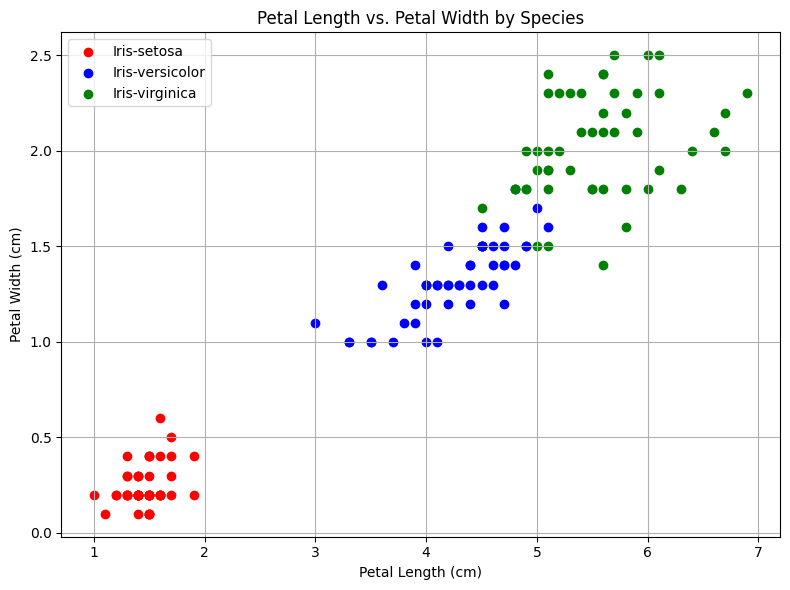

In [3]:
agent.invoke("Create a scatter plot showing petel length and width of Iris flower with different types colored as red, blue and green")

## Combining Multiple Tasks and Retrievers

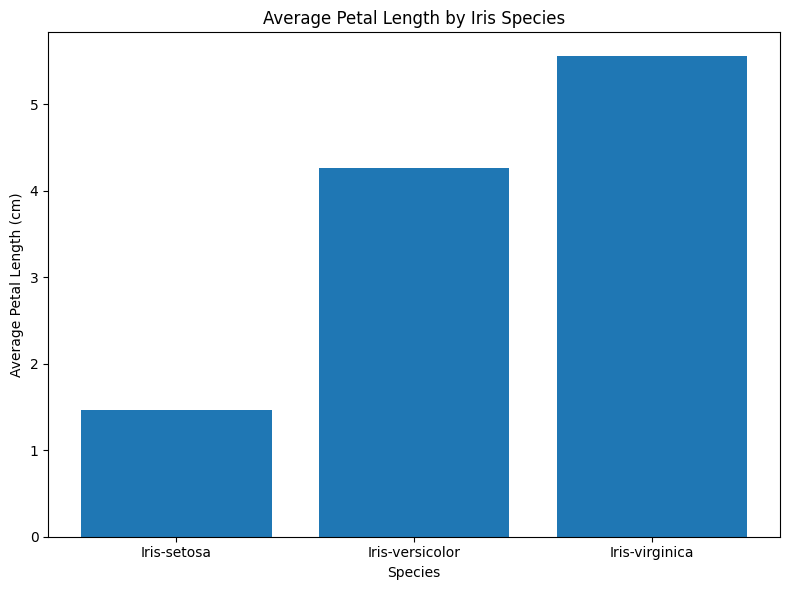

In [3]:
from agenticrag import VectorRetriever, QuestionAnsweringTask

agent = RAGAgent(
    retrievers=[TableRetriever(), VectorRetriever()],
    tasks=[ChartGenerationTask(), QuestionAnsweringTask()]
)

response = agent.invoke("What is self attention? Create a bar chart showing average petal length of each species of iris flower")

In [4]:
from IPython.display import Markdown

Markdown(response.content)

Self-attention, sometimes called intra-attention, is an attention mechanism relating different positions of a single sequence in order to compute a representation of the sequence.

Here is a bar chart showing the average petal length of each species of iris flower:

![Petal Length Chart](.agenticrag_data/charts/petal_length_chart.png)